In [42]:
import pandas as pd

In [43]:
file_url = 'http://www.sectorspdr.com/sectorspdr/IDCO.Client.Spdrs.Holdings/Export/ExportCsv?symbol='
string = "XLF"
etf = file_url + string

new_file = pd.read_csv(etf, skiprows=1)
# can add skiprows=1 to get rid of the first row
# new_file.set_index('Date',inplace=True)  
new_file.head()
# to check how many columns and rows do we have to inspect your data set
# new_file.shape

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,Unnamed: 8
0,BRK.b,Berkshire Hathaway B,10.72%,171.00,-0.33,-0.19%,1.72 M,141.92 - 177.86,NaN
1,JPM,JP Morgan Chase & Co,10.67%,90.92,-0.29,-0.31%,7.59 M,63.38 - 94.51,NaN
2,WFC,Wells Fargo & Co,8.13%,54.33,-0.55,-1.00%,11.06 M,43.55 - 59.99,NaN
3,BAC,Bank of America Corp,7.85%,23.76,-0.18,-0.75%,44.72 M,14.09 - 25.80,NaN
4,C,Citigroup Inc,6.02%,66.10,-0.27,-0.40%,9.99 M,42.50 - 68.91,NaN


In [44]:
# drop a variable (column)
# axis=1 denotes that we are referring to a column, not a row
new_file = new_file.drop('Unnamed: 8', axis=1)
new_file.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
0,BRK.b,Berkshire Hathaway B,10.72%,171.00,-0.33,-0.19%,1.72 M,141.92 - 177.86
1,JPM,JP Morgan Chase & Co,10.67%,90.92,-0.29,-0.31%,7.59 M,63.38 - 94.51
2,WFC,Wells Fargo & Co,8.13%,54.33,-0.55,-1.00%,11.06 M,43.55 - 59.99
3,BAC,Bank of America Corp,7.85%,23.76,-0.18,-0.75%,44.72 M,14.09 - 25.80
4,C,Citigroup Inc,6.02%,66.10,-0.27,-0.40%,9.99 M,42.50 - 68.91


In [45]:
# change index to a symbol
new_file.index = new_file.Symbol
new_file = new_file.drop('Symbol', axis=1)
new_file.head()

,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
Symbol,,,,,,,
BRK.b,Berkshire Hathaway B,10.72%,171.00,-0.33,-0.19%,1.72 M,141.92 - 177.86
JPM,JP Morgan Chase & Co,10.67%,90.92,-0.29,-0.31%,7.59 M,63.38 - 94.51
WFC,Wells Fargo & Co,8.13%,54.33,-0.55,-1.00%,11.06 M,43.55 - 59.99
BAC,Bank of America Corp,7.85%,23.76,-0.18,-0.75%,44.72 M,14.09 - 25.80
C,Citigroup Inc,6.02%,66.10,-0.27,-0.40%,9.99 M,42.50 - 68.91


In [46]:
# drop an observation (row)
new_file = new_file.drop(['BRK.b'])
new_file.head()

,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
Symbol,,,,,,,
JPM,JP Morgan Chase & Co,10.67%,90.92,-0.29,-0.31%,7.59 M,63.38 - 94.51
WFC,Wells Fargo & Co,8.13%,54.33,-0.55,-1.00%,11.06 M,43.55 - 59.99
BAC,Bank of America Corp,7.85%,23.76,-0.18,-0.75%,44.72 M,14.09 - 25.80
C,Citigroup Inc,6.02%,66.10,-0.27,-0.40%,9.99 M,42.50 - 68.91
USB,US Bancorp,2.74%,52.10,-0.39,-0.73%,4.42 M,41.13 - 56.61


In [47]:
# let's take a look at index of columns names
new_file.columns

Index(['Company Name', 'Index Weight', 'Last', 'Change', '%Change', 'Volume',
       '52 Week Range'],
      dtype='object')

In [48]:
# info to get additional info about our data set
# so we got pandas data frame of 64 rows and 9 columns
# object type is a generic type in pandas stored as a string 
new_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, JPM to NAVI
Data columns (total 7 columns):
Company Name     65 non-null object
Index Weight     65 non-null object
Last             65 non-null float64
Change           65 non-null float64
%Change          65 non-null object
Volume           65 non-null object
52 Week Range    65 non-null object
dtypes: float64(2), object(5)
memory usage: 4.1+ KB


In [49]:
# exploratory data analysis
# counts of unique values
new_file.Change.value_counts().head(10)

-0.10    2
-0.05    2
 0.65    2
-0.02    2
-0.14    2
 0.05    2
-0.08    2
-0.01    1
-0.18    1
 0.59    1
Name: Change, dtype: int64

In [50]:
# summary statistics (performed on numeric data only)
new_file.describe()

,Last,Change
count,65.000000,65.000000
mean,83.665538,0.328769
std,65.953053,1.321035
min,13.020000,-2.070000
25%,46.440000,-0.140000
50%,66.490000,0.050000
75%,93.960000,0.450000
max,428.710000,6.960000


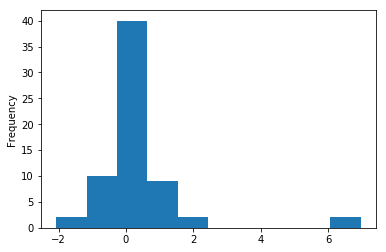

In [51]:
import matplotlib.pyplot as plt
new_file.Change.plot('hist')
plt.show()

In [52]:
# lets identify the growth drivers (outliers)
stat = new_file[new_file.Change > 0.5]
stat.head()

,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
Symbol,,,,,,,
BLK,BlackRock Inc,1.71%,428.71,1.43,+0.33%,301.58 K,336.84 - 442.84
CME,CME Group Inc A,1.35%,121.21,0.65,+0.54%,1.09 M,98.95 - 127.96
COF,Capital One Financial,1.29%,87.97,6.96,+8.59%,7.49 M,65.00 - 96.92
ICE,Intercontinental Exchange Inc,1.28%,66.49,0.65,+0.98%,1.41 M,52.15 - 67.34
SPGI,S&P Global Inc,1.28%,153.56,2.44,+1.61%,1.86 M,107.21 - 151.63


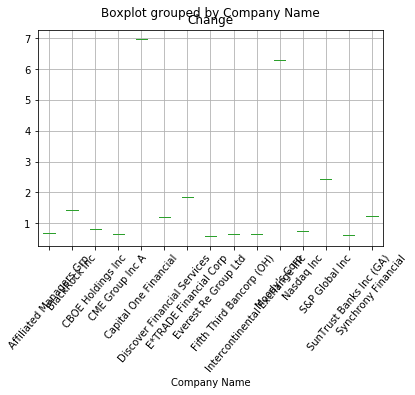

In [53]:
# descriptive statistics 
# boxplot is a convenient way of graphically reresenting groups of numerical data 
# through their quartiles
stat.boxplot(column='Change', by='Company Name')
plt.xticks(rotation=50)
plt.show()

In [54]:
new_file[new_file['Volume'].str.contains("K")]

,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
Symbol,,,,,,,
CB,Chubb Limited,2.25%,146.97,0.35,+0.24%,984.47 K,121.48 - 148.32
PNC,PNC Finl Services Group,2.02%,126.32,-0.63,-0.49%,912.19 K,81.35 - 131.83
BLK,BlackRock Inc,1.71%,428.71,1.43,+0.33%,301.58 K,336.84 - 442.84
PRU,Prudential Financial Inc,1.57%,111.52,0.46,+0.41%,850.28 K,72.25 - 114.55
MMC,Marsh & McLennan Companies,1.35%,80.03,0.39,+0.49%,842.64 K,62.33 - 80.47
AON,Aon plc,1.20%,139.06,0.22,+0.16%,406.57 K,105.35 - 139.06
TRV,Travelers Cos Inc,1.15%,124.94,0.37,+0.30%,826.68 K,103.45 - 129.60
ALL,Allstate Corp,1.07%,89.18,-0.04,-0.04%,981.33 K,66.55 - 90.74
STT,State Street Corp,1.06%,90.92,0.05,+0.06%,807.38 K,57.15 - 92.84


In [55]:
def num_k(x):
    if "K" in x:
        x = x.replace('K', ' ')
        x = pd.to_numeric(x, errors='coerce')
        x *= 1000
#         print("K",x)
    else:
        x = x.replace('M', ' ')
        x = pd.to_numeric(x, errors='coerce')
        x *= 1000000
#         print("M",x)
    return x 

new_file['Volume'] = new_file['Volume'].apply(num_k)
new_file.head()

,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
Symbol,,,,,,,
JPM,JP Morgan Chase & Co,10.67%,90.92,-0.29,-0.31%,7590000.0,63.38 - 94.51
WFC,Wells Fargo & Co,8.13%,54.33,-0.55,-1.00%,11060000.0,43.55 - 59.99
BAC,Bank of America Corp,7.85%,23.76,-0.18,-0.75%,44720000.0,14.09 - 25.80
C,Citigroup Inc,6.02%,66.10,-0.27,-0.40%,9990000.0,42.50 - 68.91
USB,US Bancorp,2.74%,52.10,-0.39,-0.73%,4420000.0,41.13 - 56.61


In [56]:
new_file.Volume.sum()

223473650.0

In [57]:
# lets get drop % in Index Weight
new_file["Index Weight"] = new_file["Index Weight"].str.replace("%", "").apply(pd.to_numeric)
new_file.head()

,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
Symbol,,,,,,,
JPM,JP Morgan Chase & Co,10.67,90.92,-0.29,-0.31%,7590000.0,63.38 - 94.51
WFC,Wells Fargo & Co,8.13,54.33,-0.55,-1.00%,11060000.0,43.55 - 59.99
BAC,Bank of America Corp,7.85,23.76,-0.18,-0.75%,44720000.0,14.09 - 25.80
C,Citigroup Inc,6.02,66.10,-0.27,-0.40%,9990000.0,42.50 - 68.91
USB,US Bancorp,2.74,52.10,-0.39,-0.73%,4420000.0,41.13 - 56.61
